<a href="https://colab.research.google.com/github/verma-satyam/ML-Coding-Ninjas/blob/main/14.%20KMeans/3_KMeans_Class_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

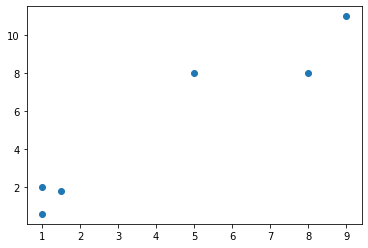

In [8]:
X = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])
plt.scatter(X[:,0],X[:,1])
plt.show();

In [24]:
class K_Means:
  def __init__(self, k = 2, max_iter = 100):
    print("Constructor")
    self.k = k
    self.max_iter = max_iter

  def fit(self,data):
    self.means = []
    # randomly initialize the means, pick firt k data points and assign them as means
    for i in range(self.k):
      self.means.append(data[i])
    for i in range(self.max_iter):
      # assign the datapoints to the cluster that they belong to
      ## creating empty clusters
      clusters = []
      for j in range(self.k):
        clusters.append([])
      for point in data:
        ## find distance to all mean values and find min dist. 
        dis = [((point - m)**2).sum() for m in self.means]
        minDis = min(dis)
        ## Find the mean for which dist is mini. --> mean lth.
        l = dis.index(minDis)
        ## add this point to cluster l.
        clusters[l].append(point)

      # stop early
      change = False
      # calc the new mean values
      for j in range(self.k):
        new_mean = np.average(clusters[j],axis=0)
        if not np.array_equal(self.means[j],new_mean):
          change = True
        self.means[j] = new_mean
      if not change:
        break

  def predict(self,test):
    pred = []
    for point in test:
      ## find distance to all mean values and find min dist. 
      dis = [((point - m)**2).sum() for m in self.means]
      minDis = min(dis)
      ## Find the mean for which dist is mini. --> mean lth.
      l = dis.index(minDis)
      ## add this point to cluster l.
      pred.append(l)
    return pred

In [25]:
kms = K_Means()

Constructor


In [26]:
kms.fit(X)
cluster = np.array(kms.means) # cluster_centers_

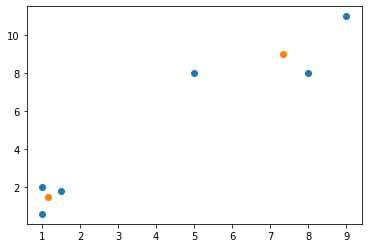

In [27]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(cluster[:,0],cluster[:,1])
plt.show();

In [28]:
kms.predict(X)

[0, 0, 1, 1, 0, 1]